In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pip install -q tensorflow-model-optimization

In [ ]:
import tensorflow_model_optimization as tfmot

In [ ]:
import pandas as pd
import plotly.graph_objects as graph
from sklearn.model_selection import train_test_split
import tensorflow.keras as k
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/mushrooms.csv')
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
df['class'] = df['class'].map({'p': 1, 'e': 0})

In [ ]:
cbp = df.groupby(['population'])['class'].value_counts(normalize=True).unstack()
cbp = cbp.sort_values(by=1, ascending=False)

fig = graph.Figure(data=[
    graph.Scatter(name='Poisonous', x=cbp.index, y=cbp[1]),
    graph.Scatter(name='Edible', x=cbp.index, y=cbp[0])
])
fig.show()

In [ ]:
cbh = df.groupby(['habitat'])['class'].value_counts(normalize=True).unstack()
cbh = cbh.sort_values(by=1, ascending=False)

fig = graph.Figure(data=[
    graph.Scatter(name='Poisonous', x=cbh.index, y=cbh[1]),
    graph.Scatter(name='Edible', x=cbh.index, y=cbh[0])
])
fig.show()

In [ ]:
y = df.loc[:,'class'].values
X = df.drop(['class'], axis=1)

In [ ]:
encoder = OneHotEncoder(drop='first')
X = encoder.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

In [ ]:
def create_model():
  model = k.models.Sequential()
  model.add(k.layers.Input(shape=X_train.shape[1:]))
  model.add(k.layers.Dense(32, activation='selu', kernel_initializer='lecun_normal'))
  model.add(k.layers.Dense(16, activation='selu', kernel_initializer='lecun_normal'))
  model.add(k.layers.Dense(8, activation='selu', kernel_initializer='lecun_normal'))
  model.add(k.layers.Dropout(rate=0.2))
  model.add(k.layers.Dense(1, activation='sigmoid', kernel_initializer='uniform'))
  return model

In [ ]:
model = create_model()

In [ ]:
optimizer = k.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
163/163 [==============================] - 3s 6ms/step - loss: 0.3196 - accuracy: 0.8963 - val_loss: 0.0347 - val_accuracy: 0.9931
Epoch 2/10
163/163 [==============================] - 1s 3ms/step - loss: 0.0236 - accuracy: 0.9960 - val_loss: 0.0079 - val_accuracy: 0.9985
Epoch 3/10
163/163 [==============================] - 1s 3ms/step - loss: 0.0085 - accuracy: 0.9992 - val_loss: 0.0028 - val_accuracy: 0.9985
Epoch 4/10
163/163 [==============================] - 1s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 1s 4ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.7313e-04 - val_accuracy: 1.0000
Epoch 6/10
163/163 [==============================] - 2s 11ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 2.2891e-04 - val_accuracy: 1.0000
Epoch 7/10
163/163 [==============================] - 1s 8ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 1.8189e-04 - val_accuracy: 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3072      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,745
Trainable params: 3,745
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.evaluate(X_test, y_test, verbose=0)

[3.2035492040449753e-05, 1.0]

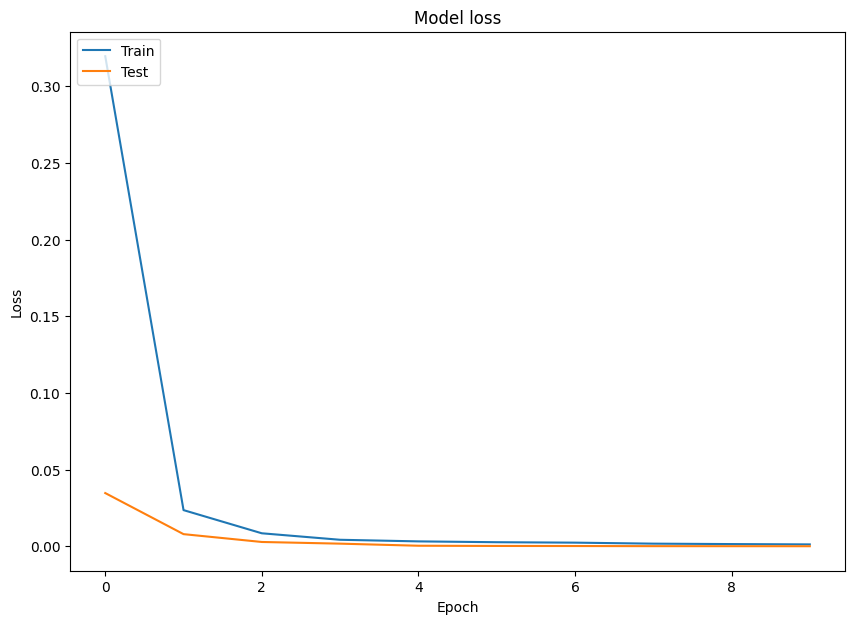

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

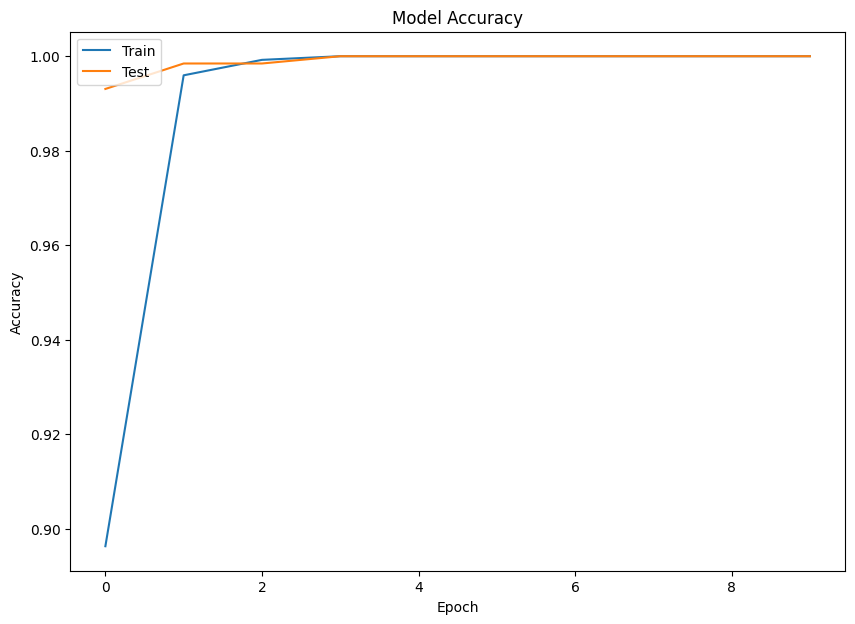

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# model.save('/content/drive/MyDrive/datasets/model/mushrooms_model.hdf5')
k.models.save_model(model, '/content/drive/MyDrive/datasets/model/mushrooms_model.h5', include_optimizer=False)

<h1><strong>Prunning

In [ ]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

In [ ]:
# VALIDATION_SPLIT = 0.1
# EPOCHS=10

In [ ]:
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
          initial_sparsity=0.50,
          final_sparsity=0.80,
          begin_step=0,
          end_step=10)
}

In [ ]:
pmodel = create_model()
pmodel.load_weights('/content/drive/MyDrive/datasets/model/mushrooms_model.h5')

In [ ]:
model_for_pruning = prune_low_magnitude(pmodel, **pruning_params)

In [ ]:
model_for_pruning.compile(optimizer='nadam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
model_for_pruning.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_dense_4  (None, 32)               6114      
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_5  (None, 16)               1042      
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dense_6  (None, 8)                266       
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_dropout  (None, 8)                1         
 _1 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_dense_7  (None, 1)               

In [ ]:
callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
]

In [ ]:
h = model_for_pruning.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/10
163/163 [==============================] - 15s 14ms/step - loss: 9.2359e-04 - accuracy: 1.0000 - val_loss: 1.1148e-05 - val_accuracy: 1.0000
Epoch 2/10
163/163 [==============================] - 1s 8ms/step - loss: 5.2097e-04 - accuracy: 1.0000 - val_loss: 7.4544e-06 - val_accuracy: 1.0000
Epoch 3/10
163/163 [==============================] - 1s 8ms/step - loss: 2.5829e-04 - accuracy: 1.0000 - val_loss: 7.5615e-07 - val_accuracy: 1.0000
Epoch 4/10
163/163 [==============================] - 2s 9ms/step - loss: 2.1089e-04 - accuracy: 1.0000 - val_loss: 1.8907e-07 - val_accuracy: 1.0000
Epoch 5/10
163/163 [==============================] - 1s 6ms/step - loss: 1.3343e-04 - accuracy: 1.0000 - val_loss: 1.1630e-07 - val_accuracy: 1.0000
Epoch 6/10
163/163 [==============================] - 1s 6ms/step - loss: 1.2962e-04 - accuracy: 1.0000 - val_loss: 7.3925e-08 - val_accuracy: 1.0000
Epoch 7/10
163/163 [==============================] - 1s 4ms/step - loss: 1.3207e-04 - accuracy: 1

In [ ]:
model_for_pruning.evaluate(X_test, y_test, verbose=0)

[1.0014332474383991e-08, 1.0]

<h1><strong>Result

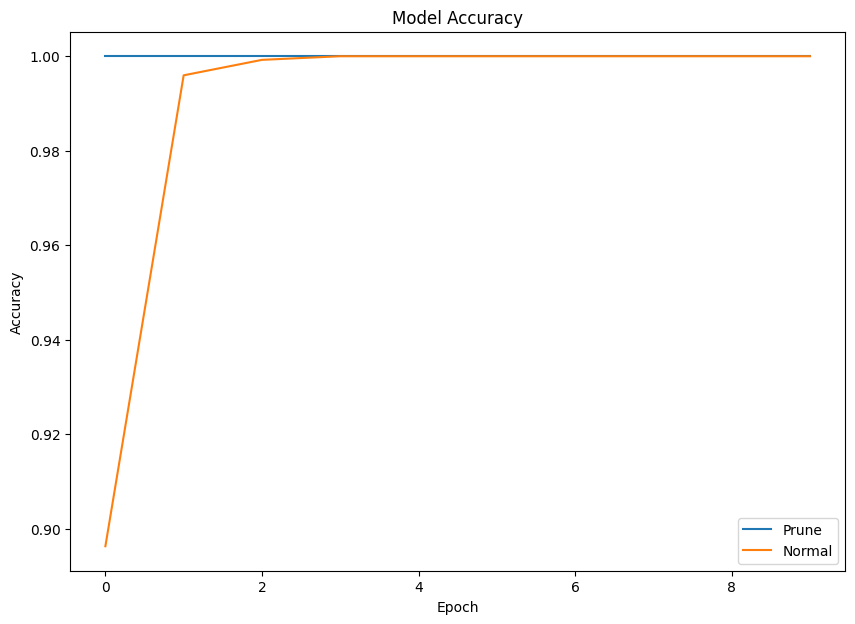

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(h.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Prune', 'Normal'], loc='lower right')
plt.show()